In [24]:
import numpy as np
import sys
sys.path.append("../src/data")
from load_data import load_online
import matplotlib.pyplot as plt

In [4]:
df = load_online(path="../data/online_retail_II.xlsx")

In [6]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


## Cleaning the data

We firstly assume no work must be done to the time zones, as it is assumed the time is all recorded in one unified time zone

In [9]:
df.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [ ]:
df[df['Customer ID'].isna()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525233,538160,20956,NaN,288,2010-12-09 17:18:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


For the purposes of this project, we drop the Transactions with a null customer ID. We are trying to predict cutomers profitability based on past transactions, and therefore must have unique identifiers.

In [ ]:
df = df.loc[~df['Customer ID'].isna()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


### Distribution of Geographical Locations

In [26]:
np.unique(df['Country'], return_counts=True)

(array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada',
        'Channel Islands', 'Cyprus', 'Denmark', 'EIRE', 'Finland',
        'France', 'Germany', 'Greece', 'Iceland', 'Israel', 'Italy',
        'Japan', 'Korea', 'Lithuania', 'Malta', 'Netherlands', 'Nigeria',
        'Norway', 'Poland', 'Portugal', 'RSA', 'Singapore', 'Spain',
        'Sweden', 'Switzerland', 'Thailand', 'USA', 'United Arab Emirates',
        'United Kingdom', 'Unspecified', 'West Indies'], dtype=object),
 array([   654,    537,     42,   1054,     62,     77,    906,    554,
           428,   8710,    354,   5710,   8129,    517,     71,     74,
           731,    224,     63,    154,    172,   2769,     30,    369,
           194,   1024,     65,    117,   1278,    883,   1187,     76,
           244,    318, 379423,    280,     54]))

It is clear that the United Kingdom has a disproportionate number of purchasers, as the retail company is UK-based.

In [ ]:
countries, country_counts = np.unique(df['Country'], return_counts=True)
countries_w_counts = dict(zip(countries, country_counts))
countries_w_counts.pop("United Kingdom")
print(countries_w_counts)

{'Australia': 654, 'Austria': 537, 'Bahrain': 42, 'Belgium': 1054, 'Brazil': 62, 'Canada': 77, 'Channel Islands': 906, 'Cyprus': 554, 'Denmark': 428, 'EIRE': 8710, 'Finland': 354, 'France': 5710, 'Germany': 8129, 'Greece': 517, 'Iceland': 71, 'Israel': 74, 'Italy': 731, 'Japan': 224, 'Korea': 63, 'Lithuania': 154, 'Malta': 172, 'Netherlands': 2769, 'Nigeria': 30, 'Norway': 369, 'Poland': 194, 'Portugal': 1024, 'RSA': 65, 'Singapore': 117, 'Spain': 1278, 'Sweden': 883, 'Switzerland': 1187, 'Thailand': 76, 'USA': 244, 'United Arab Emirates': 318, 'Unspecified': 280, 'West Indies': 54}


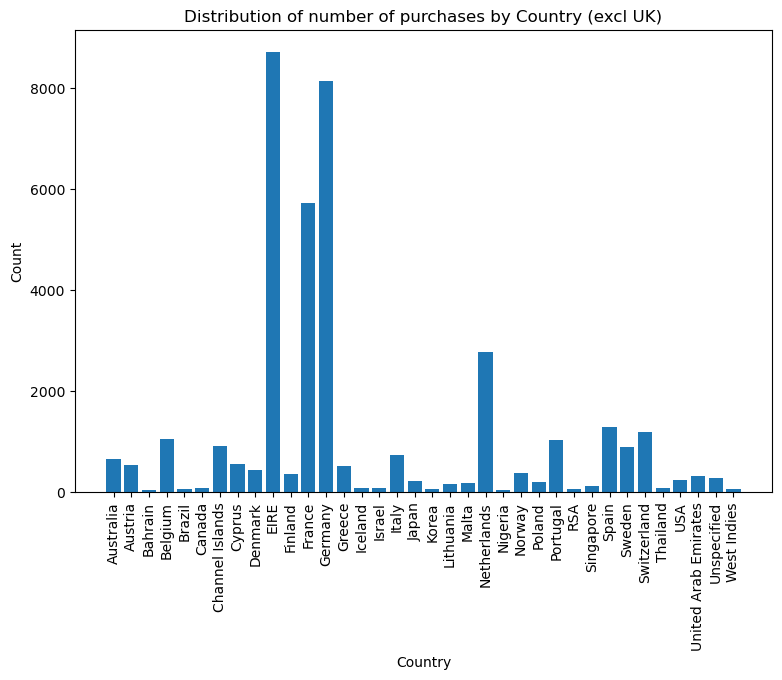

In [71]:
plt.figure(figsize=(9,6))
plt.bar(countries_w_counts.keys(), countries_w_counts.values())
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Distribution of number of purchases by Country (excl UK)")
plt.xticks(rotation=90)
plt.show()

We can see by the figure that the countries with the highest number of purchases outside of the UK are EIRE (Ireland), France, Germany, and the Netherlands, which makes sense as they are all high GDP countries in a near vicinity to the UK.

We will do a quick additional check on the profit obtained from each country

In [76]:
df[df['Country'] == 'Korea']['Price'].sum()

150.23999999999998

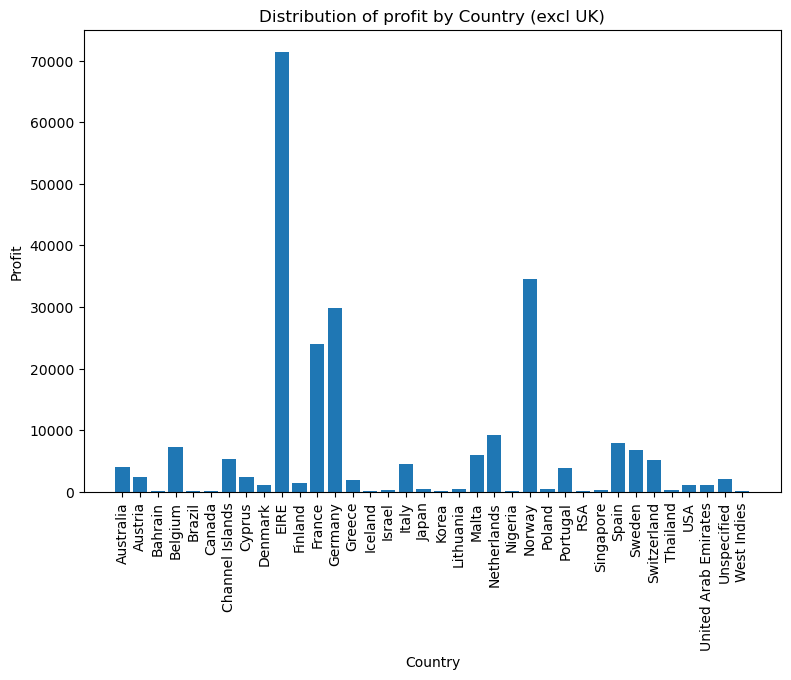

In [77]:
profits_by_country = {}
for country in countries:
    profit = df[df['Country'] == country]['Price'].sum()
    profits_by_country[country] = profit

profits_by_country.pop("United Kingdom")
plt.figure(figsize=(9,6))
plt.bar(profits_by_country.keys(), profits_by_country.values())
plt.xlabel("Country")
plt.ylabel("Profit")
plt.title("Distribution of profit by Country (excl UK)")
plt.xticks(rotation=90)
plt.show()

The findings indicate Ireland are top purchasers, but Norway interestingly although have small number of purchases, have an exceptionally high profitability, as they clearly make large expensive purchases!


## Temporal Analysis of the data

In [78]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [90]:
df = df.sort_values("InvoiceDate")
df["date"]   = df["InvoiceDate"].dt.date
df["hour"]   = df["InvoiceDate"].dt.hour
df["day"]    = df["InvoiceDate"].dt.day
df["week"]   = df["InvoiceDate"].dt.isocalendar().week
df["month"]  = df["InvoiceDate"].dt.to_period("M")
df["weekday"]= df["InvoiceDate"].dt.day_name()
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,hour,day,week,month,weekday
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,7,1,49,2009-12,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,7,1,49,2009-12,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,7,1,49,2009-12,Tuesday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01,7,1,49,2009-12,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01,7,1,49,2009-12,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525425,538171,21879,HEARTS GIFT TAPE,5,2010-12-09 20:01:00,0.65,17530.0,United Kingdom,2010-12-09,20,9,49,2010-12,Thursday
525396,538171,22824,3 TIER SWEETHEART GARDEN SHELF,1,2010-12-09 20:01:00,35.95,17530.0,United Kingdom,2010-12-09,20,9,49,2010-12,Thursday
525410,538171,22417,PACK OF 60 SPACEBOY CAKE CASES,3,2010-12-09 20:01:00,0.55,17530.0,United Kingdom,2010-12-09,20,9,49,2010-12,Thursday
525412,538171,20760,GARDEN PATH POCKET BOOK,3,2010-12-09 20:01:00,0.85,17530.0,United Kingdom,2010-12-09,20,9,49,2010-12,Thursday


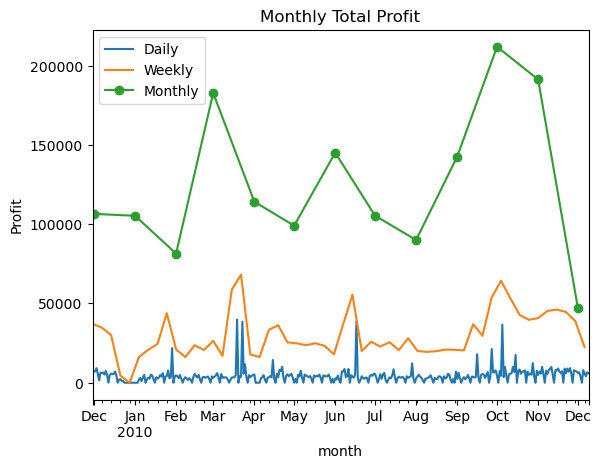

In [94]:
daily_profit = (
    df
    .set_index("InvoiceDate")
    .resample("D")["Price"]
    .sum()
)

daily_profit.plot(label= "Daily")
plt.title("Daily Total Profit")

weekly_profit = daily_profit.resample("W").sum()

weekly_profit.plot(label="Weekly")
plt.title("Weekly Total Profit")

monthly_profit = (
    df
    .groupby("month")["Price"]
    .sum()
)

monthly_profit.plot(marker="o", label="Monthly")
plt.title("Monthly Total Profit")
plt.ylabel("Profit")
plt.legend()
plt.show()


Profits hit a low at the beginning of the year, likely following the festive season spending, and proceeds to periodically spike (usually between months where there are holidays in the northern hemisphere, such as March, June/July), and drop (likely when people return back to work). There is the largest spike because of the festive season spending, starting around October (near Black Friday), and peaking before December.